<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


#### Add your code below following the instructions given in the course


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
%config InlineBackend.figure_format='retina'

## Task 3: Load in the Dataset in your Jupyter Notebook

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Task 4: Generate Descriptive Statistics and Visualizations

**For the "Median value of owner-occupied homes" provide a boxplot**

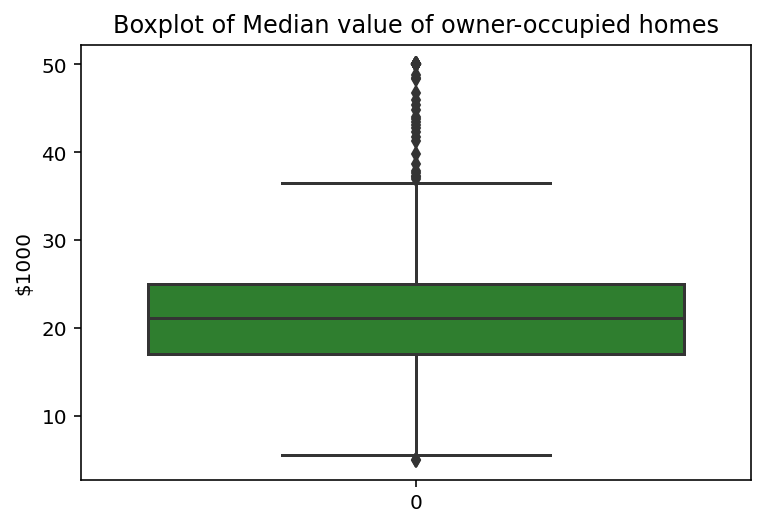

In [3]:
ax = sns.boxplot(data = boston_df.MEDV, color = "forestgreen")
ax.set_title('Boxplot of Median value of owner-occupied homes')
ax.set_ylabel('$1000')
ax.set_xlabel('')
plt.show()

The median value of owner-occupied homes is just above $20.000, whereas the highest is around $50.000.

**Provide a  bar plot for the Charles river variable**

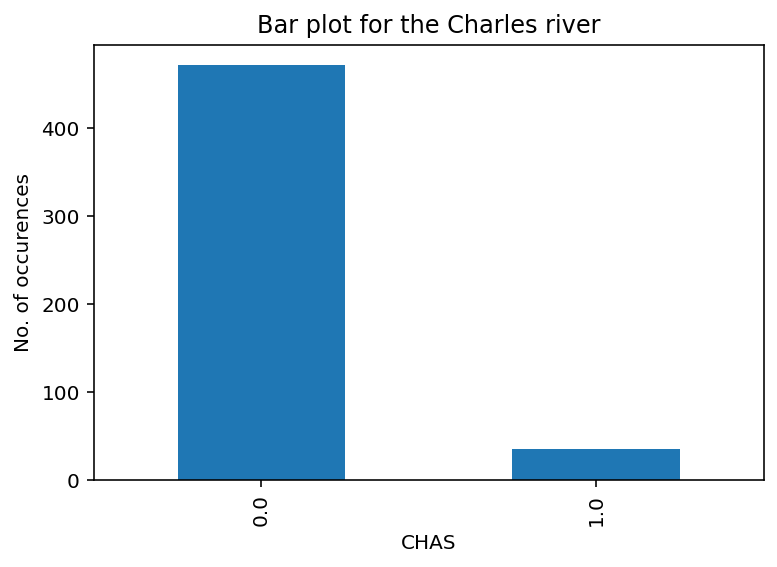

In [4]:
CR = boston_df.groupby(['CHAS']).size().reset_index(name='Counts')
ax = CR.plot(kind = 'bar', x = "CHAS", legend = False)
ax.set_title("Bar plot for the Charles river")
ax.set_ylabel('No. of occurences')
plt.show()

The majority of the observation do not tract bounds river (CHAS = 0).

**Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

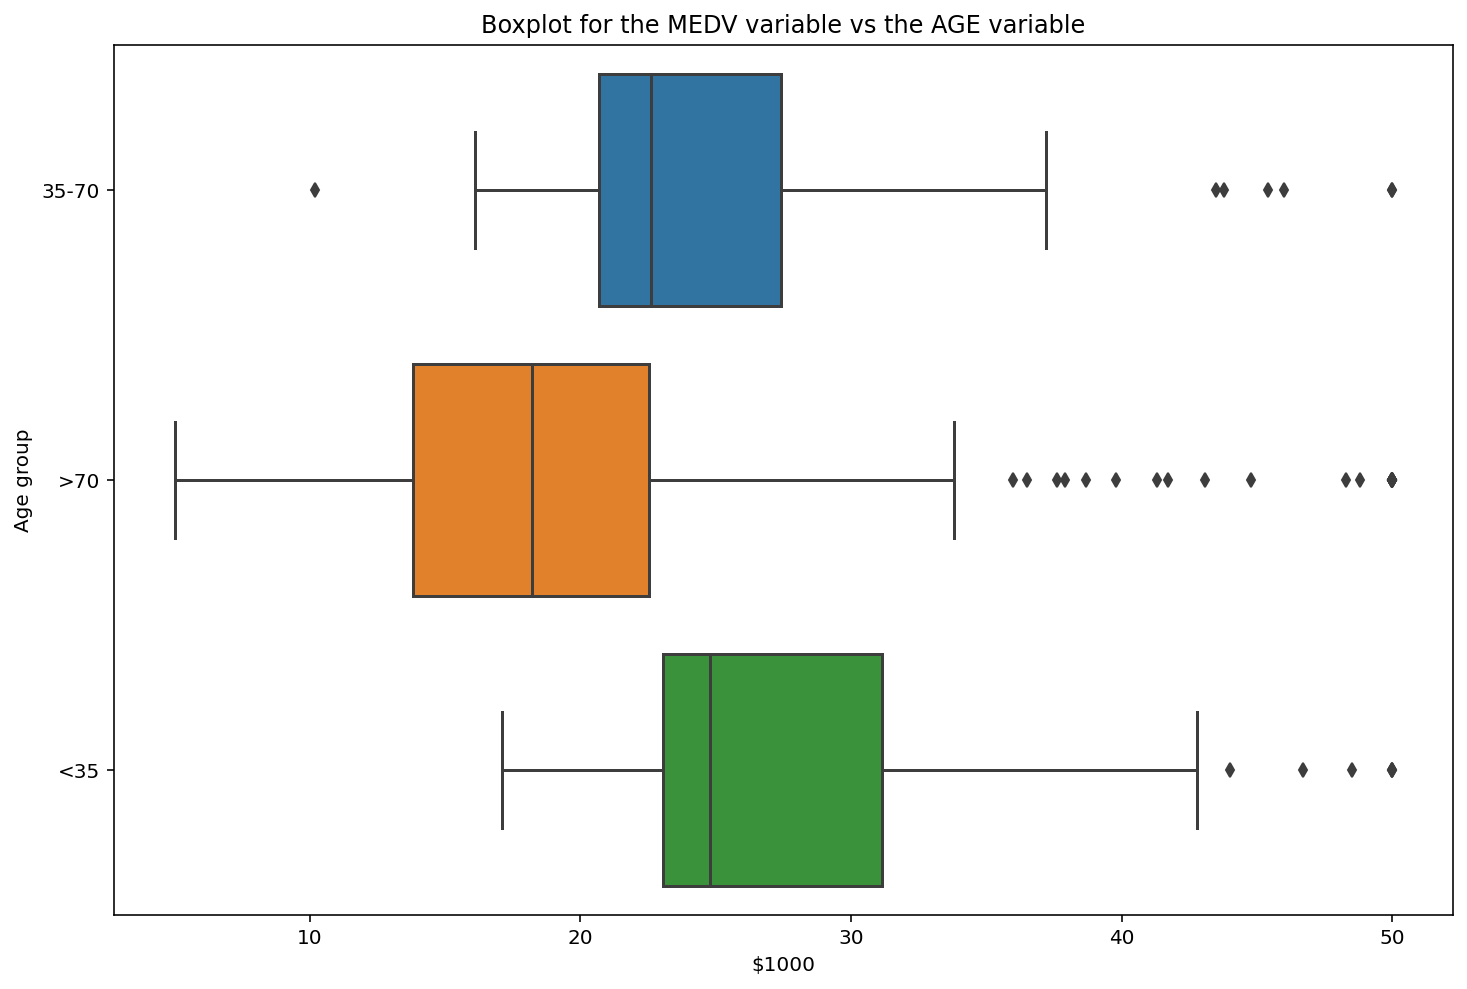

In [5]:
# Crate new column in df with the defined age group.
boston_df.loc[(boston_df["AGE"] <= 35),'AGE_GROUP'] = '<35'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70),'AGE_GROUP'] = '35-70'
boston_df.loc[(boston_df["AGE"] >= 70),'AGE_GROUP'] = '>70'

# Create boxplot
fig, ax = plt.subplots(figsize = (12, 8)) 
sns.boxplot(data = boston_df, x = "MEDV", ax = ax, y = "AGE_GROUP")
ax.set_title('Boxplot for the MEDV variable vs the AGE variable')
ax.set_ylabel('Age group')
ax.set_xlabel('$1000')
plt.show()

The youngest people (35 years and younger) pays the highest price in general, while the oldest people buys the cheapest houses.

**Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

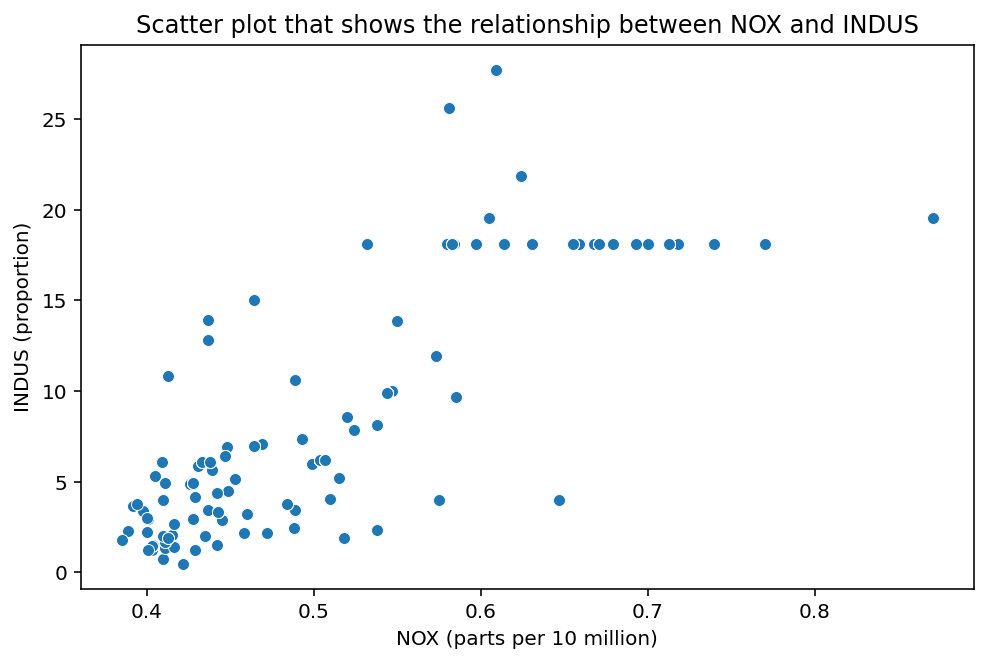

In [6]:
plt.figure(figsize = (8,5))
ax = sns.scatterplot(x = boston_df.NOX, y = boston_df.INDUS, data = boston_df)
ax.set_title("Scatter plot that shows the relationship between NOX and INDUS")
ax.set_ylabel('INDUS (proportion)')
ax.set_xlabel('NOX (parts per 10 million)')
plt.show()

There is a tendancy of a linear relationship between INDUS and NOX until INDUS reach around 18.

**Create a histogram for the pupil to teacher ratio variable**

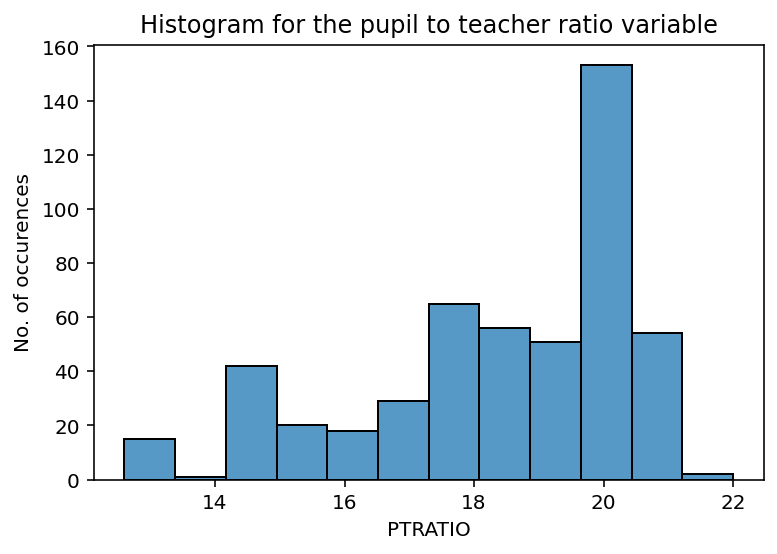

In [7]:
ax = sns.histplot(boston_df.PTRATIO, bins=12, kde = False)
ax.set_title("Histogram for the pupil to teacher ratio variable")
ax.set_ylabel('No. of occurences')
ax.set_xlabel('PTRATIO')
plt.show()

There are the highest no. of pupil-teacher ratio by town around a ratio of 20. It also appears that the distribution of PT Ratio is left-skewed.

## Task 5: Use the appropriate tests to answer the questions provided.

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

*Hypothesis*: 
* $H_{0}: µ1 = µ2 $  (There is no difference in the median value of houses bounded by the Charles river)
* $H_{1}: µ1 ≠ µ2 $ (There is a difference in the median value of houses bounded by the Charles river)

First we check the test significance with Levene's test to see if we can assume equality of variance.

In [11]:
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157676, pvalue=5.40253511973145e-95)

With α = 0.05 the variance are not equal as the p-value is less than 0.05. For the purpose of this exercise, we will move along.

Now we check the hypothesis.

In [12]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

*Conclusion*: Since the p-value is less than α = 0.05, we reject the null hypothesis. There is a statistical difference in the median value of houses bounded by the Charles river.

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

In Task 4 we grouped the data into three categories, which is necessary as the one-way ANOVA can't work with continuous variables.

*Hypothesis*: 
* $H_{0}: µ1 = µ2 = µ3 $  (The three population means are equal)
* $H_{1}:$ At least one of the means differ

In [15]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == "<35"]['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == "35-70"]['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == ">70"]['MEDV'], center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

With α = 0.05 the variance are equal as the p-value is greater than 0.05.

Now we separate the three samples (one for each age category) and run the one-way ANOVA.

In [20]:
tf_lower = boston_df[boston_df['AGE_GROUP'] == "<35"]['MEDV']
tf_seventy = boston_df[boston_df['AGE_GROUP'] == "35-70"]['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == ">70"]['MEDV']

scipy.stats.f_oneway(tf_lower, tf_seventy, seventy_older)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

*Conclusion:* 
Since the p-value is less than α = 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

*Hypothesis*: 
* $H_{0}:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. 
* $H_{1}:$ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

We conduct the pearson correlation test.

In [21]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.763651446920915, 7.913361061239593e-98)

*Conclusion:* Since the p-value is less than α = 0.05, we reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

*Hypothesis*: 
* $H_{0}: β1  = 0 $ (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)
* $H_{1}: β1 ≠ 0 $ (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

In [24]:
# X is the input variables (or independent variables)
X = boston_df['DIS']

# y is the target/dependent variable
y = boston_df['MEDV']

# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# Fit OLS model and make predictions
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the summary statistics
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           1.21e-08
Time:                        17:38:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Conclusion:* Since the p-value is less than α = 0.05, we can reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient for DIS is positive 1.09, which indicates that the impact increases by 1.09 when there is an additional weighted distance to the five Boston employment centres.